In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

### DATA

In [2]:
raw = pd.read_csv('listings.csv')
raw.shape


(15778, 75)

The data has 15,778 observations and 75 variables. The aim of my study is to predict the prices of entire homes or apartments
where accommodates range between 2 and 6. Therefore, I filter my data.

In [3]:
raw = raw[raw['room_type'] == 'Entire home/apt']
raw.drop('room_type', axis = 1, inplace = True)
raw = raw[raw['accommodates'].between(2,6)]
raw.shape

(8298, 74)

In [4]:
raw.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4,135513,https://www.airbnb.com/rooms/135513,20221211170659,2022-12-11,city scrape,APARTMENT AT RAMBLA POBLE NOU AND BEACH,AMAZING APARTMENT AT RAMBLA OF POBLE NOU ; ONL...,NaN,https://a0.muscache.com/pictures/9578738/40581...,664196,...,4.80,4.83,4.56,NaN,f,2,2,0,0,0.96
5,23197,https://www.airbnb.com/rooms/23197,20221211170659,2022-12-11,city scrape,"Forum CCIB DeLuxe, Spacious, Elegant ,Christmas","Beautiful spacious apartment, large terrace, 5...","Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,...,4.98,4.58,4.62,HUTB005057,f,2,2,0,0,0.45
7,32711,https://www.airbnb.com/rooms/32711,20221211170659,2022-12-11,city scrape,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,...,4.84,4.86,4.51,HUTB-001722,t,3,3,0,0,0.60
8,359841,https://www.airbnb.com/rooms/359841,20221211170659,2022-12-11,city scrape,"BacRou, design loft near the sea",BacRou is an apartment that has a minimalist s...,NaN,https://a0.muscache.com/pictures/4437266/1801d...,1820272,...,4.88,4.66,4.64,HUTB-003912,t,5,5,0,0,3.06
10,363601,https://www.airbnb.com/rooms/363601,20221211170659,2022-12-12,city scrape,stylish flat in barcelona center,<b>The space</b><br />Recently refurbished thi...,NaN,https://a0.muscache.com/pictures/38669984/67b5...,1837053,...,4.67,4.54,4.13,NaN,f,1,1,0,0,0.21


After filtering we can see that the data has 8,298 observations.

### PRICE VARIABLE

Let's examine price variable to understand how it is distributed. 

In [5]:
raw.price.head()

4      $90.00
5     $195.00
7      $73.00
8      $74.00
10     $60.00
Name: price, dtype: object

Price is expressed in dollar units and it is of object data type. Let's first convert it into numeric. 

In [6]:
raw["price"] = raw["price"].str[1:].str.replace(",","").astype('float')
raw.price.head()

4      90.0
5     195.0
7      73.0
8      74.0
10     60.0
Name: price, dtype: float64

Let's check the descriptive statistics of price variable 

In [7]:
raw['price'].describe(percentiles = [0.05,0.25,0.5,0.75,0.95,0.98])

count     8298.000000
mean       142.100111
std        620.185055
min         10.000000
5%          43.000000
25%         71.000000
50%        100.000000
75%        139.000000
95%        275.000000
98%        387.060000
max      45123.000000
Name: price, dtype: float64

It can be clearly observed that the distribution has highly extreme values after 98th percentile. This observations can distort
our models.

### Filtering Price Variable

I am going to apply winsoring method by replacing price values above 98th percentile with 98th percentile.

Let's replace with 98th percentile 

In [8]:
raw = raw[raw['price'] <= 388]

Let's check the distribution of the price variable

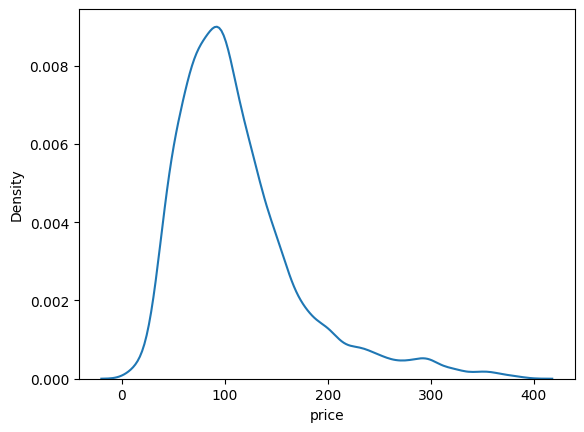

In [9]:
sns.kdeplot(data = raw, x = 'price');

We can see that the price variable follows a bimodal distribution

### VARIABLES

Let's check variables of the data

In [10]:
raw.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
4,135513,https://www.airbnb.com/rooms/135513,20221211170659,2022-12-11,city scrape,APARTMENT AT RAMBLA POBLE NOU AND BEACH,AMAZING APARTMENT AT RAMBLA OF POBLE NOU ; ONL...,NaN,https://a0.muscache.com/pictures/9578738/40581...,664196,...,4.80,4.83,4.56,NaN,f,2,2,0,0,0.96
5,23197,https://www.airbnb.com/rooms/23197,20221211170659,2022-12-11,city scrape,"Forum CCIB DeLuxe, Spacious, Elegant ,Christmas","Beautiful spacious apartment, large terrace, 5...","Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,...,4.98,4.58,4.62,HUTB005057,f,2,2,0,0,0.45
7,32711,https://www.airbnb.com/rooms/32711,20221211170659,2022-12-11,city scrape,Sagrada Familia area - Còrsega 1,A lovely two bedroom apartment only 250 m from...,What's nearby <br />This apartment is located...,https://a0.muscache.com/pictures/357b25e4-f414...,135703,...,4.84,4.86,4.51,HUTB-001722,t,3,3,0,0,0.60
8,359841,https://www.airbnb.com/rooms/359841,20221211170659,2022-12-11,city scrape,"BacRou, design loft near the sea",BacRou is an apartment that has a minimalist s...,NaN,https://a0.muscache.com/pictures/4437266/1801d...,1820272,...,4.88,4.66,4.64,HUTB-003912,t,5,5,0,0,3.06
10,363601,https://www.airbnb.com/rooms/363601,20221211170659,2022-12-12,city scrape,stylish flat in barcelona center,<b>The space</b><br />Recently refurbished thi...,NaN,https://a0.muscache.com/pictures/38669984/67b5...,1837053,...,4.67,4.54,4.13,NaN,f,1,1,0,0,0.21


I see a bunch of URLs and ID columns. Since they do not convey any information, I can remove them. 

In [11]:
raw.drop(['id','listing_url','scrape_id','picture_url','host_id','host_url','host_thumbnail_url','host_picture_url'],
        axis = 1, inplace = True)

Natural Language Processing is above the scope of this analysis. Therefore, I remove name, description and neighborhood_overview
variables. However, a detailed analysis of those variables may increase the quality of analysis.

In [12]:
raw.drop(['name','description','neighborhood_overview','source','license'], axis = 1, inplace = True)

### Host Related Variables

In [13]:
raw.loc[:,raw.columns.str.contains("host")].head()

,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
4,Teresa,2011-06-04,"Barcelona, Spain",Me encanta disfrutar de Barcelona. Es una ciud...,within an hour,83%,18%,f,El Poblenou,2.0,2.0,"['email', 'phone']",t,t,2,2,0,0
5,Etain (Marnie),2010-03-09,"Catalonia, Spain","Hi there, I'm marnie from Australia, though I ...",within an hour,100%,100%,t,El Besòs i el Maresme,5.0,10.0,"['email', 'phone']",t,t,2,2,0,0
7,Nick,2010-05-31,"Barcelona, Spain",I'm Nick your English host in Barcelona.\r\n\r...,within an hour,100%,100%,f,Camp d'en Grassot i Gràcia Nova,3.0,15.0,"['email', 'phone', 'work_email']",t,t,3,3,0,0
8,Rosa,2012-02-27,"Barcelona, Spain",Im a positive and energetic woman! I love trav...,within an hour,100%,100%,t,El Poblenou,6.0,18.0,"['email', 'phone']",t,t,5,5,0,0
10,Ayal,2012-03-01,Spain,"I manage some of the most attractive, high sta...",NaN,NaN,NaN,f,El Raval,2.0,21.0,"['email', 'phone']",t,t,1,1,0,0


The host_name does not convey information, host_about should be examined with NLP techniques.  Therefore, they are removed.

In [14]:
raw.drop(['host_name','host_about'], axis = 1, inplace = True)

Host location may be an important variable because an host may be local or not. I will add a flag variable indicating if the host
is from Spain or not. 

In [15]:
raw['host_location'] = raw['host_location'].str.lower()
raw['flag_local'] = np.where(raw['host_location'].str.contains('spain'), 1, 0 )
raw.drop(['host_location'], axis = 1, inplace = True)
raw.drop(['host_neighbourhood'], axis = 1, inplace = True)

I see that 97% of hosts are local

In [16]:
round(sum(raw['flag_local']) / len(raw['flag_local']),2)

0.97

Host response time may affect the price. Therefore, I am going to keep them.

In [17]:
raw.host_response_time.unique()

array(['within an hour', nan, 'within a day', 'within a few hours',
       'a few days or more'], dtype=object)

In [18]:
raw.loc[:,raw.columns.str.contains("listing")].head()

,host_listings_count,host_total_listings_count,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
4,2.0,2.0,2,2,0,0
5,5.0,10.0,2,2,0,0
7,3.0,15.0,3,3,0,0
8,6.0,18.0,5,5,0,0
10,2.0,21.0,1,1,0,0


We see a bunch of listings variables. Among those calculated_host_listings_count is the most sophisticated because its value 
is calculated based on other variables. Therefore, I am going to keep this but remove the rest.

In [19]:
raw.drop(['host_listings_count','host_total_listings_count','calculated_host_listings_count_entire_homes',
         'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'],
         axis = 1, inplace = True)

Response rate and acceptance rate should be converted into numeric forms

In [20]:
raw["host_response_rate"] = raw["host_response_rate"].str[:-1].astype("float") / 100
raw["host_acceptance_rate"] = raw["host_acceptance_rate"].str[:-1].astype("float") / 100

host_identit_verified contains the informatiın host_has_profile_pic and host_verifications. Therefore, I remove 
host_has_profile_pic, host_verifications. 

In [21]:
raw.drop(['host_has_profile_pic', 'host_verifications'], axis = 1, inplace = True)

host_is_superhost, host_identity_verified are binary variables. Let's convert them into dummies.

In [22]:
raw['host_is_superhost'] = np.where(raw['host_is_superhost'] == 't', 1, 0 )
raw['host_identity_verified'] = np.where(raw['host_identity_verified'] == 't', 1, 0 )

### Review Related Variables

In [23]:
raw.loc[:,raw.columns.str.contains("review")].head()

,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month
4,131,0,0,2011-10-05,2021-09-23,4.64,4.74,4.68,4.69,4.80,4.83,4.56,0.96
5,65,12,0,2011-03-15,2022-10-23,4.75,4.92,4.89,4.94,4.98,4.58,4.62,0.45
7,83,20,2,2011-07-17,2022-12-09,4.40,4.41,4.46,4.86,4.84,4.86,4.51,0.60
8,391,57,6,2012-06-11,2022-12-04,4.67,4.81,4.55,4.91,4.88,4.66,4.64,3.06
10,26,0,0,2012-08-20,2018-08-23,4.20,4.26,4.39,4.52,4.67,4.54,4.13,0.21


In [24]:
raw[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness',
      'review_scores_checkin', 'review_scores_communication','review_scores_location',
      'review_scores_value']].corr()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
review_scores_rating,1.000000,0.847926,0.761907,0.706162,0.776387,0.594534,0.850847
review_scores_accuracy,0.847926,1.000000,0.743580,0.671172,0.722508,0.578897,0.801867
review_scores_cleanliness,0.761907,0.743580,1.000000,0.572078,0.601062,0.494862,0.720603
review_scores_checkin,0.706162,0.671172,0.572078,1.000000,0.734656,0.503087,0.657018
review_scores_communication,0.776387,0.722508,0.601062,0.734656,1.000000,0.527203,0.685705
review_scores_location,0.594534,0.578897,0.494862,0.503087,0.527203,1.000000,0.591368
review_scores_value,0.850847,0.801867,0.720603,0.657018,0.685705,0.591368,1.000000


Since review_scores_rating is the weighted average of other scores, it is highly correlated with them . Slighly 
review_scores_location has lower correlation. Therefore, I will keep only review_scores_rating and review_scores_location.

In [25]:
raw.drop(['review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
          'review_scores_communication','review_scores_location','review_scores_value',
          'reviews_per_month'], axis = 1, inplace = True)


### Availability

In [26]:
raw.loc[:,raw.columns.str.contains("availability")].head()

,has_availability,availability_30,availability_60,availability_90,availability_365
4,t,30,60,90,365
5,t,20,50,80,255
7,t,5,27,39,276
8,t,19,31,41,263
10,t,11,11,11,144


I replace variables with the actual availability per month rather than leaving them as aggregated. Because this will reduce
the correlation.

In [27]:
raw['availability_1'] = raw['availability_30']
raw['availability_2'] = raw['availability_60'] - raw['availability_30']
raw['availability_3'] = raw['availability_90'] - raw['availability_60']
raw['availability_4'] = raw['availability_365'] - raw['availability_90']
raw.drop(['availability_30','availability_60','availability_90','availability_365'], axis = 1, inplace = True)

In [28]:
raw.loc[:,raw.columns.str.contains("availability")].head()

,has_availability,availability_1,availability_2,availability_3,availability_4
4,t,30,30,30,275
5,t,20,30,30,175
7,t,5,22,12,237
8,t,19,12,10,222
10,t,11,0,0,133


In [29]:
raw['has_availability'] = np.where(raw['has_availability'] == 't', 1, 0 )

### Neighbourhoods

In [30]:
raw.loc[:,raw.columns.str.contains("neighbourhood")].head()

,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed
4,NaN,el Poblenou,Sant Martí
5,"Sant Adria de Besos, Barcelona, Spain",el Besòs i el Maresme,Sant Martí
7,"Barcelona, Catalonia, Spain",el Camp d'en Grassot i Gràcia Nova,Gràcia
8,NaN,Diagonal Mar i el Front Marítim del Poblenou,Sant Martí
10,NaN,el Raval,Ciutat Vella


neighborhood_group_cleansed is the variable that indicates the districts when neighborhood_cleansed is the actual 
neighbourhoods. Let's drop irrelevant variables and convert remaining into categorical variables

In [31]:
raw.drop(['neighbourhood','latitude','longitude'], axis = 1, inplace = True)
raw['neighbourhood_cleansed'] = pd.Categorical(raw['neighbourhood_cleansed'])
raw['neighbourhood_group_cleansed'] = pd.Categorical(raw['neighbourhood_group_cleansed'])

### Bathrooms

In [32]:
raw.loc[:,raw.columns.str.contains("bath")].head()

,bathrooms,bathrooms_text
4,NaN,1.5 baths
5,NaN,2 baths
7,NaN,1.5 baths
8,NaN,1 bath
10,NaN,1 bath


In [33]:
raw.bathrooms.unique()
raw.drop('bathrooms', axis = 1, inplace = True)

In [34]:
raw['bathrooms_text'].unique()

array(['1.5 baths', '2 baths', '1 bath', nan, '2.5 baths', '3 baths',
       'Half-bath', '4 baths', '4.5 baths', '3.5 baths', '0 baths'],
      dtype=object)

In [35]:
raw['bathrooms_text'] = raw['bathrooms_text'].replace('Half-bath','0.5 ')
raw['bathrooms_text'] = raw['bathrooms_text'].str.split(' ').str[0]

In [36]:
raw["bathrooms"] = raw["bathrooms_text"].astype('float')
raw.drop('bathrooms_text', axis = 1, inplace = True)

In [37]:
raw['bathrooms'].value_counts()

1.0    5560
2.0    1954
1.5     475
3.0      67
2.5      56
0.5       9
0.0       5
4.0       3
3.5       2
4.5       1
Name: bathrooms, dtype: int64

Remove observations with low frequency

In [38]:
raw = raw.loc[~(raw['bathrooms'].isin([0.0,0.5,3.5,4.0,4.5,5.0]))]

### Beds

In [39]:
raw['beds'].value_counts()

2.0     2311
3.0     2068
1.0     1655
4.0     1290
5.0      539
6.0      176
7.0       15
8.0        6
15.0       1
9.0        1
Name: beds, dtype: int64

### Bedrooms

In [40]:
raw['bedrooms'].value_counts()


2.0    3418
1.0    2518
3.0    1630
4.0     203
5.0       3
6.0       2
Name: bedrooms, dtype: int64

In [41]:
raw.drop('beds', axis = 1, inplace = True)


Remove observations with low frequency

In [42]:
raw = raw.loc[~(raw['bedrooms'].isin([5.0,6.0]))]

### Accommodates

In [43]:
raw['accommodates'].unique()

array([5, 6, 4, 2, 3], dtype=int64)


### Property Type

In [44]:
raw['property_type'].value_counts()

Entire rental unit           6827
Entire serviced apartment     423
Entire condo                  392
Entire loft                   305
Entire guest suite             34
Entire home                    33
Entire guesthouse              23
Entire vacation home           19
Boat                           14
Entire townhouse               12
Entire villa                   11
Entire place                    5
Casa particular                 3
Tiny home                       2
Camper/RV                       2
Barn                            1
Entire home/apt                 1
Room in aparthotel              1
Name: property_type, dtype: int64

Remove observations with low frequency

In [45]:
raw = raw.loc[~(raw['property_type'].isin(['Casa particular','Tiny home','Barn','Entire home/apt','Tent','Camper/RV',
                                          'Room in aparthotel']))]

In [46]:
raw['property_type'] = pd.Categorical(raw['property_type'])

### Nights

In [47]:
raw.loc[:,raw.columns.str.contains("night")].head()

,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm
4,90,365,90.0,90.0,365.0,365.0,90.0,365.0
5,4,300,4.0,7.0,1125.0,1125.0,4.7,1125.0
7,2,31,2.0,2.0,31.0,31.0,2.0,31.0
8,2,1125,2.0,2.0,1125.0,1125.0,2.0,1125.0
10,32,350,32.0,32.0,350.0,350.0,32.0,350.0


Since price mostly determined by mimimum and maximum nighs, I will remove the remainder.

In [48]:
raw.drop(['minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
          'minimum_nights_avg_ntm','maximum_nights_avg_ntm'], axis = 1, inplace = True)

### Date Columns

In [49]:
raw[['last_scraped','host_since','calendar_updated', 'calendar_last_scraped','first_review','last_review',]]

,last_scraped,host_since,calendar_updated,calendar_last_scraped,first_review,last_review
4,2022-12-11,2011-06-04,NaN,2022-12-11,2011-10-05,2021-09-23
5,2022-12-11,2010-03-09,NaN,2022-12-11,2011-03-15,2022-10-23
7,2022-12-11,2010-05-31,NaN,2022-12-11,2011-07-17,2022-12-09
8,2022-12-11,2012-02-27,NaN,2022-12-11,2012-06-11,2022-12-04
10,2022-12-12,2012-03-01,NaN,2022-12-12,2012-08-20,2018-08-23
...,...,...,...,...,...,...
15765,2022-12-11,2020-05-15,NaN,2022-12-11,NaN,NaN
15766,2022-12-11,2012-06-03,NaN,2022-12-11,NaN,NaN
15767,2022-12-12,2019-02-06,NaN,2022-12-12,NaN,NaN
15768,2022-12-11,2019-02-06,NaN,2022-12-11,NaN,NaN


Create host_days variable

In [50]:
raw['host_days'] = (pd.to_datetime(raw['last_scraped'])-pd.to_datetime(raw['host_since'])).dt.days

In [51]:
raw.drop(['last_scraped','host_since','first_review','last_review',
          'calendar_updated','calendar_last_scraped'], axis = 1, inplace = True)

### Amenities

In [52]:
raw['amenities'] = raw['amenities'].str.lower()

In [53]:
amenities = ' '.join(list(raw.amenities))
amenities = amenities.replace('[','')
amenities = amenities.replace(']','')
amenities = amenities.replace('"','')
amenities = [x.strip() for x in amenities.split(',')]
amenities = set(amenities)

In [54]:
raw['air_conditioning'] = np.where(raw['amenities'].str.contains('air conditioning'), 1, 0)
raw['sauna'] = np.where(raw['amenities'].str.contains('sauna'), 1, 0)
raw['hot_tub'] = np.where(raw['amenities'].str.contains('hot tub'), 1, 0)
raw['gym'] = np.where(raw['amenities'].str.contains('gym'), 1, 0)
raw['pool'] = np.where(raw['amenities'].str.contains('pool'), 1, 0)
raw['sound_system'] = np.where(raw['amenities'].str.contains('sound'), 1, 0)
raw['parking'] = np.where(raw['amenities'].str.contains('parking'), 1, 0)
raw['balcony'] = np.where(raw['amenities'].str.contains('balcony|patio'), 1, 0)
raw['workspace'] = np.where(raw['amenities'].str.contains('workspace'), 1, 0)
raw['pets'] = np.where(raw['amenities'].str.contains('pet'), 1, 0)
raw['crib'] = np.where(raw['amenities'].str.contains('crib'), 1, 0)
raw['netflix_amazon'] = np.where(raw['amenities'].str.contains('netflix|amazon'), 1, 0)
raw['coffee'] = np.where(raw['amenities'].str.contains('coffee|americano'), 1, 0)

In [55]:
raw.drop('amenities',inplace = True, axis = 1)

### Binary Variables

host_is_superhost,host_identity_verified,has_availability,instant_bookable,flag_local,

In [56]:
raw['instant_bookable'] = np.where(raw['instant_bookable'] == 't', 1, 0 )

### NULL VALUES

In [57]:
raw.isna().sum().sort_values(ascending = False)

review_scores_rating              1424
host_response_time                 404
host_response_rate                 404
bedrooms                           338
host_acceptance_rate               319
bathrooms                            1
gym                                  0
availability_4                       0
host_days                            0
air_conditioning                     0
sauna                                0
hot_tub                              0
pool                                 0
availability_2                       0
sound_system                         0
parking                              0
balcony                              0
workspace                            0
pets                                 0
crib                                 0
netflix_amazon                       0
availability_3                       0
flag_local                           0
availability_1                       0
price                                0
host_is_superhost        

### Reviews per month and Review Score Ratings

In [58]:
raw[raw['review_scores_rating'].isna()]['number_of_reviews'].value_counts()

0    1424
Name: number_of_reviews, dtype: int64

I see that the review scores is null when there are not any reviews. Does it mean that those listing are by new hosts ?

In [59]:
raw[raw['review_scores_rating'].isna()]['host_days']

301      4038
573      3759
632      4176
646      3411
863      3425
         ... 
15765     940
15766    3843
15767    1405
15768    1404
15776     285
Name: host_days, Length: 1424, dtype: int64

I see that this is not the case . So I will impute the variable with the mean value and add a flag

In [60]:
raw['flag_review_scores_rating'] = np.where(raw['review_scores_rating'].isna(), 1, 0)
raw['review_scores_rating'].fillna(value=raw['review_scores_rating'].mean(), inplace=True)

The bedrooms is an important variable. Therefore, I am going to impute it with the number of accommodates and add a flag.

In [61]:
raw['flag_bedrooms'] = np.where(raw['bedrooms'].isna(), 1, 0)
raw['bedrooms'].fillna(value=raw['accommodates'], inplace=True)

Bathroom can be dropped 

In [62]:
raw.dropna(subset=['bathrooms'], inplace = True)

Host Response time , I add a category as 'unknown'

In [63]:
raw['host_response_time'].fillna(value='unknown', inplace=True)

In [64]:
raw['host_response_time'].unique()

array(['within an hour', 'unknown', 'within a day', 'within a few hours',
       'a few days or more'], dtype=object)

In [65]:
raw['host_response_time'] = pd.Categorical(raw['host_response_time'], categories = [
    'within an hour','within a few hours','within a day','a few days or more','unknown'
])

Impute response and acceptance rates with mean and flag them

In [66]:
raw['flag_host_response_rate'] = np.where(raw['host_response_rate'].isna(), 1, 0)
raw['host_response_rate'].fillna(value=raw['host_response_rate'].mean(), inplace=True)

In [67]:
raw['flag_host_acceptance_rate'] = np.where(raw['host_acceptance_rate'].isna(), 1, 0)
raw['host_acceptance_rate'].fillna(value=raw['host_acceptance_rate'].mean(), inplace=True)

In [68]:
### Explaratory Dana Analysis

In [69]:
# Binary Variables

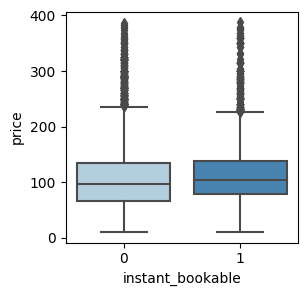

In [70]:
plt.rcParams['figure.figsize'] = (3, 3)
sns.boxplot( x = raw['instant_bookable'], y = raw['price'],palette = 'Blues');

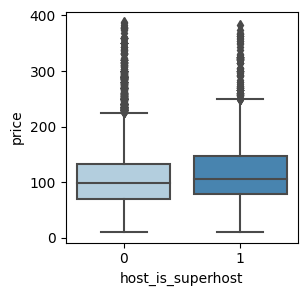

In [71]:
sns.boxplot( x = raw['host_is_superhost'], y = raw['price'],palette = 'Blues');

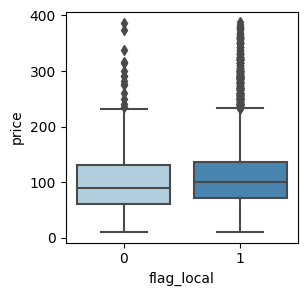

In [72]:
sns.boxplot( x = raw['flag_local'], y = raw['price'],palette = 'Blues');

In [73]:
amenities = ['air_conditioning','sauna','hot_tub','gym','pool','sound_system','parking','balcony','workspace','pets','crib',
            'netflix_amazon','coffee']

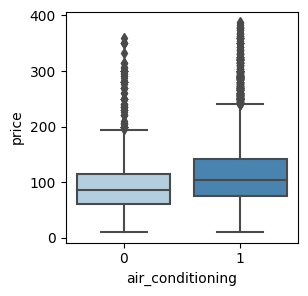

In [74]:
sns.boxplot( x = raw['air_conditioning'], y = raw['price'],palette = 'Blues');

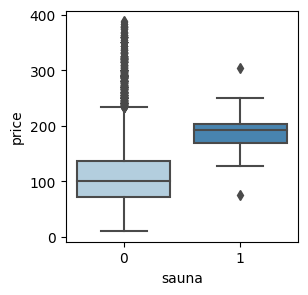

In [75]:
sns.boxplot( x = raw['sauna'], y = raw['price'],palette = 'Blues'); #increases

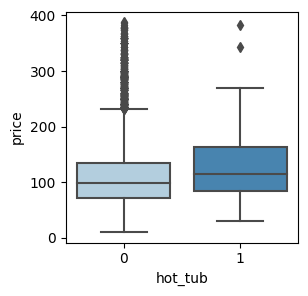

In [76]:
sns.boxplot( x = raw['hot_tub'], y = raw['price'],palette = 'Blues');

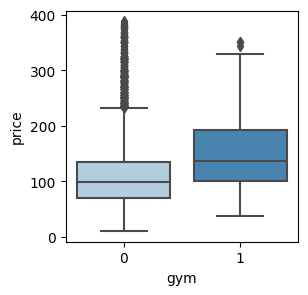

In [77]:
sns.boxplot( x = raw['gym'], y = raw['price'],palette = 'Blues'); #increases

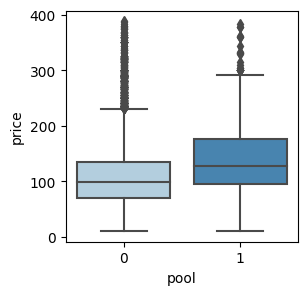

In [78]:
sns.boxplot( x = raw['pool'], y = raw['price'],palette = 'Blues'); # increases

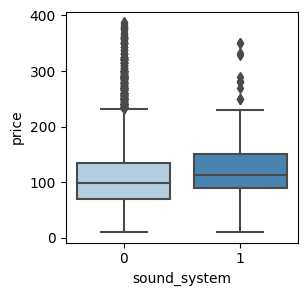

In [79]:
sns.boxplot( x = raw['sound_system'], y = raw['price'],palette = 'Blues');

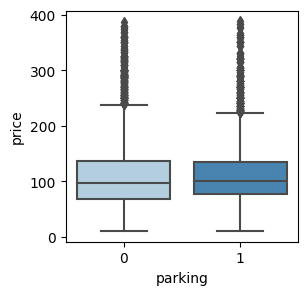

In [80]:
sns.boxplot( x = raw['parking'], y = raw['price'],palette = 'Blues');

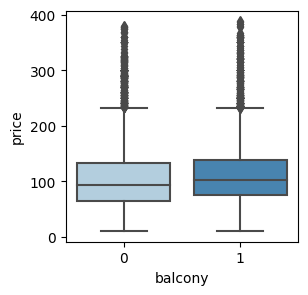

In [81]:
sns.boxplot( x = raw['balcony'], y = raw['price'],palette = 'Blues');

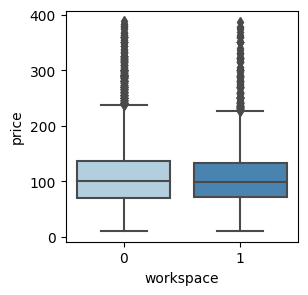

In [82]:
sns.boxplot( x = raw['workspace'], y = raw['price'],palette = 'Blues');

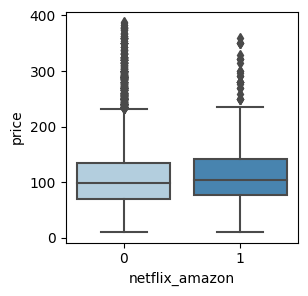

In [83]:
sns.boxplot( x = raw['netflix_amazon'], y = raw['price'],palette = 'Blues');

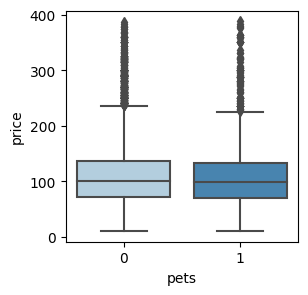

In [84]:
sns.boxplot( x = raw['pets'], y = raw['price'],palette = 'Blues');

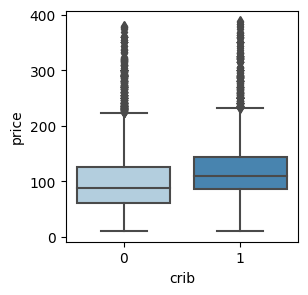

In [85]:
sns.boxplot( x = raw['crib'], y = raw['price'],palette = 'Blues'); #increases

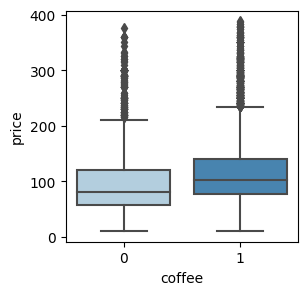

In [86]:
sns.boxplot( x = raw['coffee'], y = raw['price'],palette = 'Blues'); #increases

### Response Time

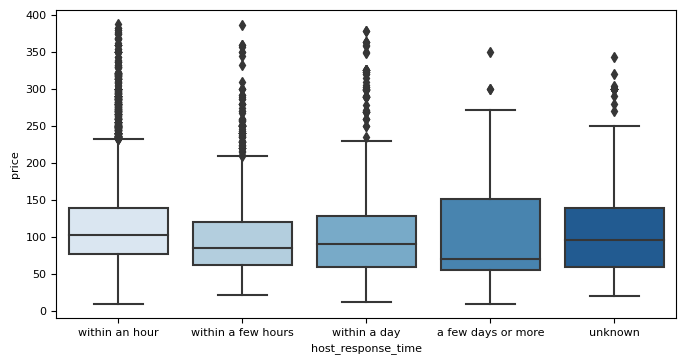

In [87]:
plt.rcParams.update({'font.size': 8})
plt.rcParams['figure.figsize'] = (8, 4)
sns.boxplot( x = raw['host_response_time'], y = raw['price'],palette = 'Blues');

### Property Type

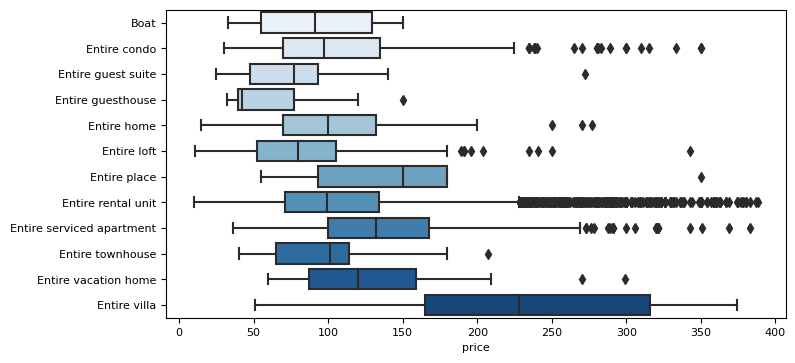

In [88]:
plt.rcParams['figure.figsize'] = (8, 4)
sns.boxplot( x = raw['price'], y =raw['property_type'],palette = 'Blues').set(ylabel="");

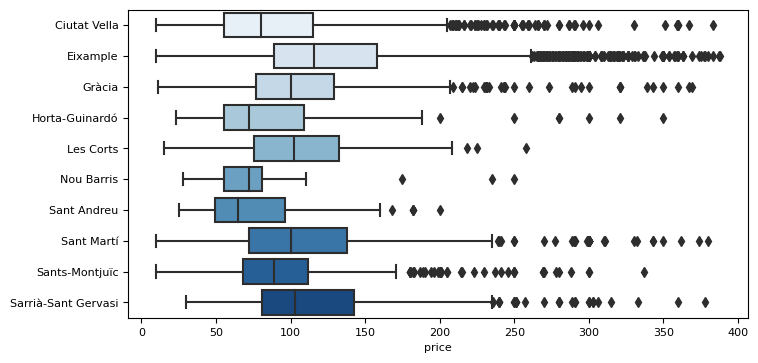

In [89]:
plt.rcParams['figure.figsize'] = (8, 4)
sns.boxplot( x = raw['price'], y =raw['neighbourhood_group_cleansed'],palette = 'Blues').set(ylabel="");

### Bedrooms

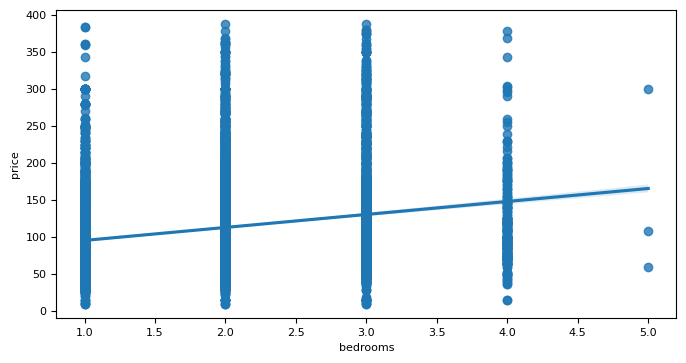

In [90]:
sns.regplot(data = raw, x = 'bedrooms', y= 'price');

### Bathrooms

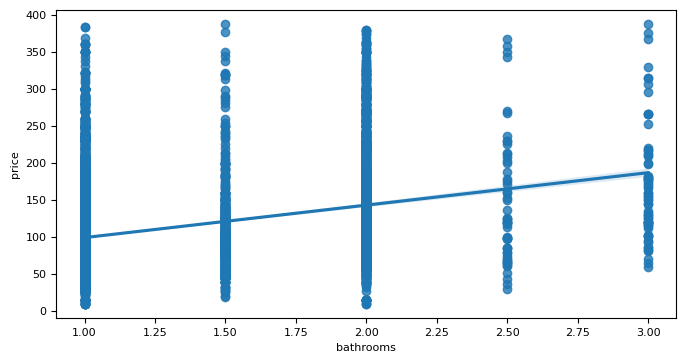

In [91]:
sns.regplot(data = raw, x = 'bathrooms', y= 'price');

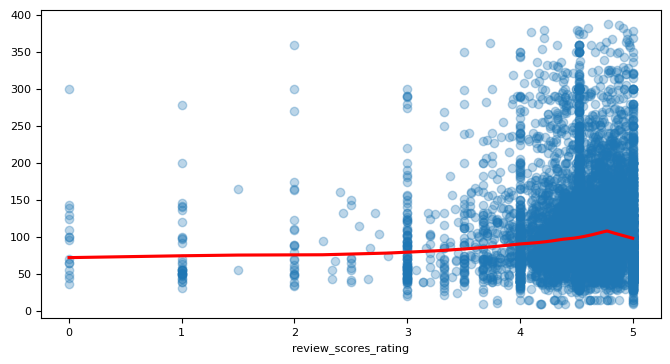

In [92]:
plt.rcParams['figure.figsize'] = (8, 4)
sns.regplot( x = raw['review_scores_rating'], y =raw['price'],lowess = True,
            scatter_kws={'alpha':0.3},line_kws={"color": "red"}).set(ylabel="");

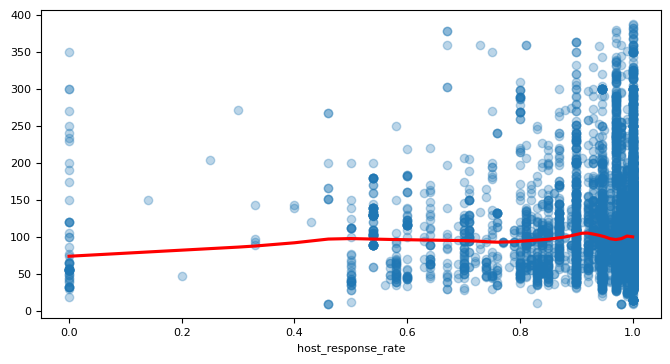

In [93]:
plt.rcParams['figure.figsize'] = (8, 4)
sns.regplot( x = raw['host_response_rate'], y =raw['price'],lowess = True,
            scatter_kws={'alpha':0.3},line_kws={"color": "red"}).set(ylabel="");

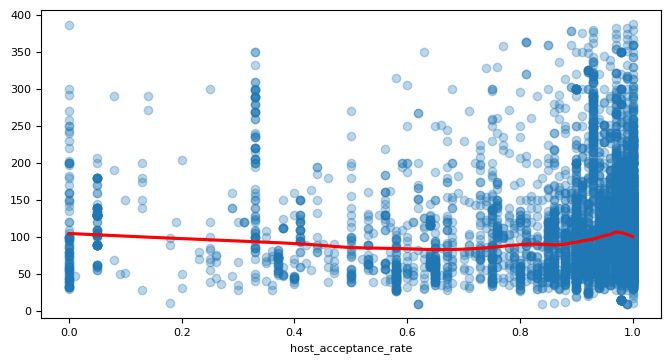

In [94]:
plt.rcParams['figure.figsize'] = (8, 4)
sns.regplot( x = raw['host_acceptance_rate'], y =raw['price'],lowess = True,
            scatter_kws={'alpha':0.3},line_kws={"color": "red"}).set(ylabel="");

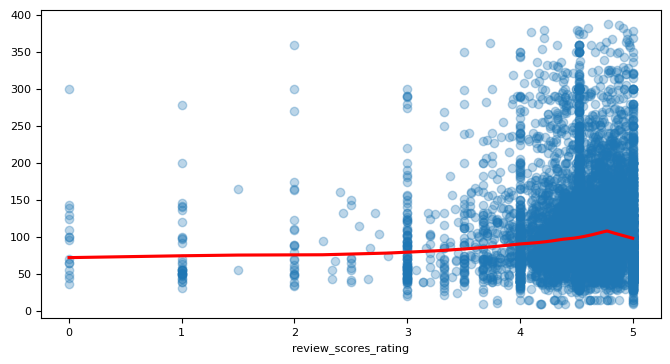

In [95]:
plt.rcParams['figure.figsize'] = (8, 4)
sns.regplot( x = raw['review_scores_rating'], y =raw['price'],lowess = True,
            scatter_kws={'alpha':0.3},line_kws={"color": "red"}).set(ylabel="");

In [96]:
raw['minimum_nights'].describe(percentiles = [0.05,0.25,0.5,0.75,0.99])

count    8097.000000
mean       15.573422
std        26.854885
min         1.000000
5%          1.000000
25%         2.000000
50%         3.000000
75%        31.000000
99%        90.000000
max      1125.000000
Name: minimum_nights, dtype: float64

Remove outliers from mimimum_nights

In [97]:
raw = raw[raw['minimum_nights'] <= 90]

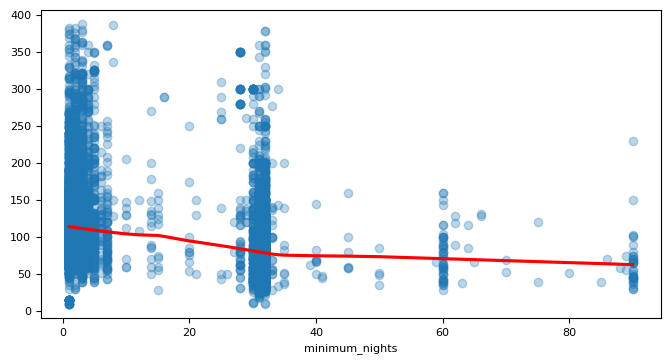

In [98]:
plt.rcParams['figure.figsize'] = (8, 4)
sns.regplot( x = raw['minimum_nights'], y =raw['price'],lowess = True,
            scatter_kws={'alpha':0.3},line_kws={"color": "red"}).set(ylabel="");

In [99]:
raw['maximum_nights'].describe(percentiles = [0.05,0.25,0.5,0.75,0.99])

count    8031.000000
mean      662.871000
std       453.710961
min         2.000000
5%         30.000000
25%       330.000000
50%       365.000000
75%      1125.000000
99%      1125.000000
max      3000.000000
Name: maximum_nights, dtype: float64

Remove outliers from maximum_nights

In [100]:
raw = raw[raw['maximum_nights'] <= 1125]

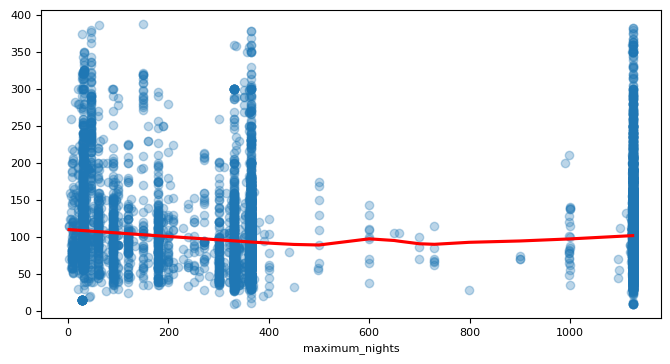

In [101]:
plt.rcParams['figure.figsize'] = (8, 4)
sns.regplot( x = raw['maximum_nights'], y =raw['price'],lowess = True,
            scatter_kws={'alpha':0.3},line_kws={"color": "red"}).set(ylabel="");

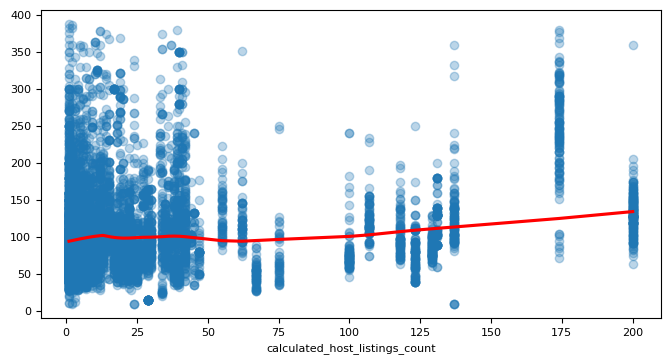

In [102]:
sns.regplot( x = raw['calculated_host_listings_count'], y =raw['price'],lowess = True,
            scatter_kws={'alpha':0.3},line_kws={"color": "red"}).set(ylabel="");

### CORRELATION PLOT

In [103]:
corr_variables = ['number_of_reviews',
 'number_of_reviews_ltm',
 'number_of_reviews_l30d']

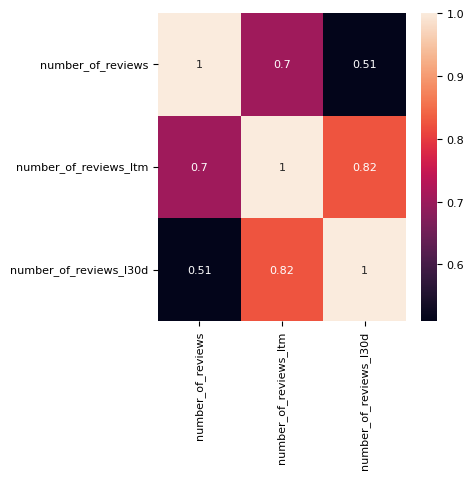

In [104]:
correlation = raw[corr_variables].corr()  
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(correlation, annot = True);

In [105]:
raw.drop(['number_of_reviews_ltm','number_of_reviews_l30d'], axis = 1, inplace =True )

In [106]:
corr_variables = ['availability_1',
 'availability_2',
 'availability_3',
 'availability_4']

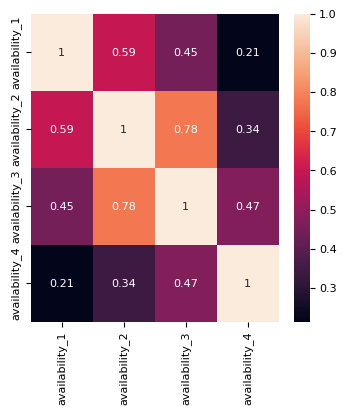

In [107]:
correlation = raw[corr_variables].corr()  
plt.rcParams['figure.figsize'] = (4, 4)
sns.heatmap(correlation, annot = True);

Since correlation is not that hight keep them

## MODELS

### RANDOM FOREST

### Random Forest Model without Tuning

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import random

In [109]:

categorical_cols = ['neighbourhood_group_cleansed','neighbourhood_cleansed', 'property_type', 'host_response_time']
le = LabelEncoder()
raw['e_neighbourhood_group_cleansed'] = le.fit_transform(raw['neighbourhood_group_cleansed'])
raw['e_property_type'] = le.fit_transform(raw['property_type'])
district = raw[['e_neighbourhood_group_cleansed', 'neighbourhood_group_cleansed']].value_counts().reset_index(name='count')
property_types = raw[['e_property_type', 'property_type']].value_counts().reset_index(name='count')

In [110]:
raw['neighbourhood_group_cleansed'] = le.fit_transform(raw['neighbourhood_group_cleansed'])
raw['property_type'] = le.fit_transform(raw['property_type'])
raw['neighbourhood_cleansed'] = le.fit_transform(raw['neighbourhood_cleansed'])
raw['host_response_time'] = le.fit_transform(raw['property_type'])

In [111]:
raw.drop(['e_neighbourhood_group_cleansed','e_property_type'],
        axis = 1, inplace = True)

In [112]:
X = raw.drop('price', axis = 1)
y = raw['price']

random.seed(10)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=10
)

random.seed(11)
base_model = RandomForestRegressor(n_estimators = 5, random_state = 42)
base_model.fit(X_train, y_train)
prediction = base_model.predict(X_test)
rmse = mean_squared_error(y_test, prediction)**0.5
print(rmse)

41.86622583799271


### Random Forest with Grid Search and Cross Validation

In [113]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [114]:

rf = RandomForestRegressor()
random.seed(12)
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                              n_iter = 5, cv = 5, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(X_train, y_train)
prediction = rf_random.predict(X_test)
rmse = mean_squared_error(y_test, prediction)**0.5

Fitting 5 folds for each of 5 candidates, totalling 25 fits
41.86622583799271


In [115]:
# I reduced the number of iterations to 5 for submission. 

### Save The Model

In [116]:
import pickle

In [117]:
model_rf = pickle.dumps(rf_random)
rf = pickle.loads(model_rf)
predictions_rf = rf.predict(X_test)
rmse = mean_squared_error(y_test, predictions_rf)**0.5
print(rmse)
rf.best_params_

38.989458068564446


{'n_estimators': 1400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 30,
 'bootstrap': True}

### Model Diagnostic

### Variable Importance Plot

In [118]:
features = list(X_train.columns)
importances = rf.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1][:20][::-1]

array([1.50932106e-02, 3.43112145e-02, 5.27968732e-02, 9.79961101e-03,
       3.93484561e-03, 4.03273941e-02, 3.47868935e-02, 1.49976415e-02,
       4.70641729e-02, 2.59656266e-02, 8.90055215e-02, 4.16080221e-02,
       5.55426142e-05, 4.71365668e-02, 4.43371010e-02, 9.64568325e-03,
       8.93400382e-02, 3.00045205e-03, 4.54585396e-02, 3.35092109e-02,
       2.60467463e-02, 4.14380683e-02, 8.12011828e-02, 6.05363889e-02,
       1.00303362e-02, 5.85355727e-04, 2.28191405e-03, 3.74363521e-03,
       8.06750811e-03, 3.27215115e-03, 8.70890939e-03, 8.08830637e-03,
       7.59297794e-03, 8.17923598e-03, 1.39480760e-02, 5.22474068e-03,
       9.07087038e-03, 6.32186819e-03, 2.60647506e-03, 5.89948261e-03,
       4.98160895e-03])

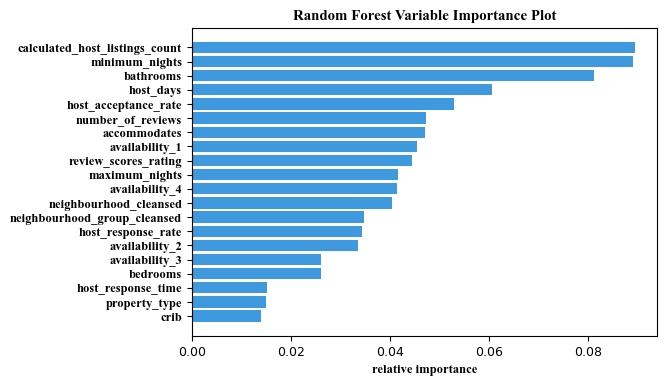

In [119]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams.update({'font.size': 9})
plt.title('Random Forest Variable Importance Plot',fontweight="bold",fontname="Times New Roman")
plt.barh(range(len(indices)), importances[indices], color='#3F99DF', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices],fontweight="bold",fontname="Times New Roman")
plt.xlabel('relative importance',fontweight="bold",fontname="Times New Roman");


### Sub-Sample Analysis

In [120]:
# Random sample of raw data set 
random.seed(13)
X_train, X_test = train_test_split(
    raw, test_size=0.33, random_state=10
)

X_test_with_predictions = X_test.assign(
    predicted_price=rf.predict(X_test.drop('price',axis =1))
)

In [121]:
def calculate_rmse(groupby_obj):
    return (
        groupby_obj.apply(
            lambda x: mean_squared_error(x.predicted_price, x.price, squared=False),
        )
        .to_frame(name="rmse")
        .assign(mean_price=groupby_obj.apply(lambda x: np.mean(x.price)).values)
        .assign(rmse_norm=lambda x: x.rmse / x.mean_price)
        .round(2)
    )

In [122]:
grouped_object_districts = X_test_with_predictions.groupby("neighbourhood_group_cleansed")
districts = calculate_rmse(grouped_object_districts)

In [123]:
districts['neighbourhood'] = ['Ciutat Vella','Eixample','Gràcia','Horta-Guinardó',
                             'Les Corts','Nou Barris','Sant Andreu','Sant Martí',
                             'Sants-Montjuïc','Sarrià-Sant Gervasi']
districts

,rmse,mean_price,rmse_norm,neighbourhood
neighbourhood_group_cleansed,,,,
0,29.00,89.02,0.33,Ciutat Vella
1,37.33,135.28,0.28,Eixample
2,28.67,104.89,0.27,Gràcia
3,31.30,86.79,0.36,Horta-Guinardó
4,28.66,120.35,0.24,Les Corts
5,26.55,85.80,0.31,Nou Barris
6,17.08,74.32,0.23,Sant Andreu
7,39.21,120.08,0.33,Sant Martí
8,27.07,97.05,0.28,Sants-Montjuïc


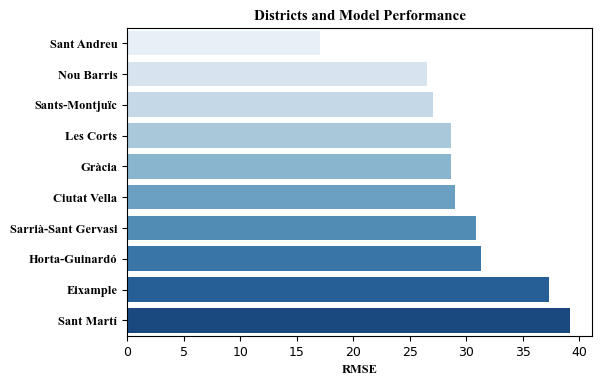

In [124]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.barplot(data = districts, y = 'neighbourhood',x = 'rmse', order=districts.sort_values('rmse').neighbourhood
            , palette = 'Blues');
plt.title('Districts and Model Performance',fontweight="bold",fontname="Times New Roman")
plt.yticks(fontweight="bold",fontname="Times New Roman")
plt.xlabel('RMSE',fontweight="bold",fontname="Times New Roman");
plt.ylabel('',fontweight="bold",fontname="Times New Roman");


In [125]:
grouped_object_property_types = X_test_with_predictions.groupby("property_type")
properties = calculate_rmse(grouped_object_property_types)


In [126]:
properties['property'] = ['Boat','Condo','Guest suite','Guesthouse',
                         'Home','Loft','Place','Rental unit',
                         'Serviced apartment','Townhouse','Vacation home',
                         'Villa',]
properties

,rmse,mean_price,rmse_norm,property
property_type,,,,
0,26.66,111.75,0.24,Boat
1,33.71,115.38,0.29,Condo
2,30.24,59.14,0.51,Guest suite
3,21.15,42.36,0.50,Guesthouse
4,19.49,89.40,0.22,Home
5,34.98,85.53,0.41,Loft
6,15.03,121.50,0.12,Place
7,32.54,112.56,0.29,Rental unit
8,35.43,136.12,0.26,Serviced apartment


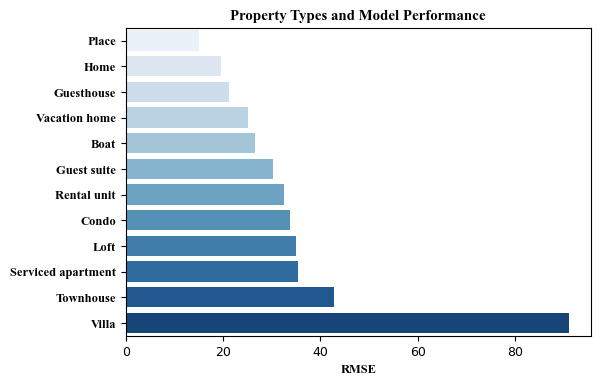

In [127]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.barplot(data = properties, y = 'property',x = 'rmse', palette = 'Blues', order=properties.sort_values('rmse').property);


plt.title('Property Types and Model Performance',fontweight="bold",fontname="Times New Roman")
plt.yticks(fontweight="bold",fontname="Times New Roman")
plt.xlabel('RMSE',fontweight="bold",fontname="Times New Roman");
plt.ylabel('',fontweight="bold",fontname="Times New Roman");


### Lasso Regression

In [128]:
import patsy

In [129]:
# model variables
numerical_variables = ('accommodates','bathrooms', 'review_scores_rating','flag_review_scores_rating','minimum_nights','maximum_nights',
                      'bedrooms')
factor_variables = ('neighbourhood_cleansed','neighbourhood_group_cleansed','property_type','host_response_time')
dummy_variables = ('air_conditioning','gym','sauna','pool','hot_tub','sound_system')

In [130]:
#interaction terms
interactions = ("neighbourhood_cleansed*property_type")

In [131]:
# model setup
model_setup = (
    "~"
    + "+".join(numerical_variables + factor_variables + dummy_variables)
    + "+"
    + interactions
)

In [132]:
y_work, X_work = patsy.dmatrices("price" + model_setup, raw)
X_work_featnames = X_work.design_info.column_names

random.seed(14)
X_train, X_test, y_train, y_test = train_test_split(
    X_work, y_work, test_size=0.2, random_state=10
)

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_work = scaler.fit_transform(X_work)

In [134]:
from sklearn.linear_model import LassoCV
random.seed(15)
lasso_cv_fit = LassoCV(cv=5, random_state=42).fit(X_train, y_train)

C:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1561: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [135]:
lasso_cv_fit.alpha_

0.12239210190259453

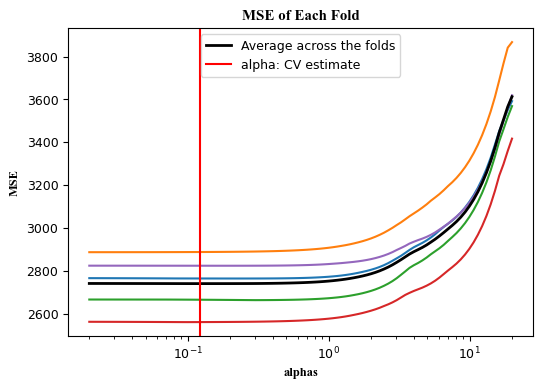

In [136]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.semilogx(lasso_cv_fit.alphas_, lasso_cv_fit.mse_path_, "-")
plt.plot(
    lasso_cv_fit.alphas_ ,
    lasso_cv_fit.mse_path_.mean(axis=-1),
    'k',
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    lasso_cv_fit.alpha_, linestyle = '-', color= 'red', label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas",fontweight="bold",fontname="Times New Roman")
plt.ylabel("MSE",fontweight="bold",fontname="Times New Roman")
plt.title("MSE of Each Fold",fontweight="bold",fontname="Times New Roman")
plt.axis("tight");


In [137]:
rmse_lasso = (mean_squared_error(y_test, lasso_cv_fit.predict(X_test)))**0.5
rmse_lasso

50.33255580649667

In [138]:
list(zip(lasso_cv_fit.coef_, X))

[(0.0, 'host_response_time'),
 (7.611081298865465, 'host_response_rate'),
 (14.461117071015712, 'host_acceptance_rate'),
 (2.638583618016338, 'host_is_superhost'),
 (4.8756793914637395, 'host_identity_verified'),
 (-16.0737842145091, 'neighbourhood_cleansed'),
 (-3.7255627906448336, 'neighbourhood_group_cleansed'),
 (1.6765555834456358, 'property_type'),
 (0.0, 'accommodates'),
 (-3.9595522338827185, 'bedrooms'),
 (1.3598138720279282, 'minimum_nights'),
 (7.609797668164842e-16, 'maximum_nights'),
 (5.104770999674113, 'has_availability'),
 (2.6833862138578426, 'number_of_reviews'),
 (0.9634564307251647, 'review_scores_rating'),
 (4.838265427750878, 'instant_bookable'),
 (1.4106092417927536, 'calculated_host_listings_count'),
 (2.813403800128676, 'flag_local'),
 (2.1749316620582384, 'availability_1')]

### OLS

In [139]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression

In [140]:
cv = KFold(n_splits=5, random_state=1, shuffle=True)

In [141]:
model_OLS = LinearRegression()
numerical_variables = ('accommodates','bathrooms', 'review_scores_rating','flag_review_scores_rating','minimum_nights')
factor_variables = ('neighbourhood_group_cleansed','property_type')
dummy_variables = ('air_conditioning','gym','sauna','pool','hot_tub','sound_system')
interactions = ("neighbourhood_group_cleansed*property_type")

In [142]:
# model setup
model_setup = (
    "~"
    + "+".join(numerical_variables + factor_variables + dummy_variables)
    + "+"
    + interactions
)

In [143]:
model_OLS.fit(X_train,y_train)

LinearRegression()

In [144]:
scores = cross_val_score(model_OLS, X_train, y_train, scoring='neg_mean_squared_error',
                         cv=cv)


In [145]:
predictions = cross_val_predict(model_OLS, X_test, y_test, cv=cv)
mean_squared_error(y_test, predictions)**0.5

50.89273811097641